# Assignment 2 Q2


##Section A

**The K-Means Algorithm and Its Connection to Quantization**

The k-means algorithm is a clustering algorithm used for classifying data into groups or clusters. It operates by identifying the centroids of k clusters, where k is a predefined number. Then, each data point is assigned to the nearest cluster. In other words, the points in each group are closer to their cluster’s centroid than to those of other clusters.
Steps of the k-means algorithm:
1.	Initialization: The algorithm randomly selects k points as initial centroids (these represent the colors in the image).
2.	Classification: Each data point, meaning each pixel in the image, is assigned to the closest cluster among the k colors based on Euclidean distance.
3.	Update: The centroids of the clusters are recalculated as the average of all the data points (pixels) assigned to that cluster.
4.	Iteration: Steps 2 and 3 are being repeated until the centroids stabilize or a predefined number of iterations is reached.

The algorithm is used for quantization by reducing the number of colors in an image to a smaller set of selected colors. This is done by replacing each color in the image with the nearest one among the k selected colors. In other words, the reduction in the number of colors is performed while maintaining the best possible visual similarity to the original image.


---

**Advantages and Disadvantages of K-Means**

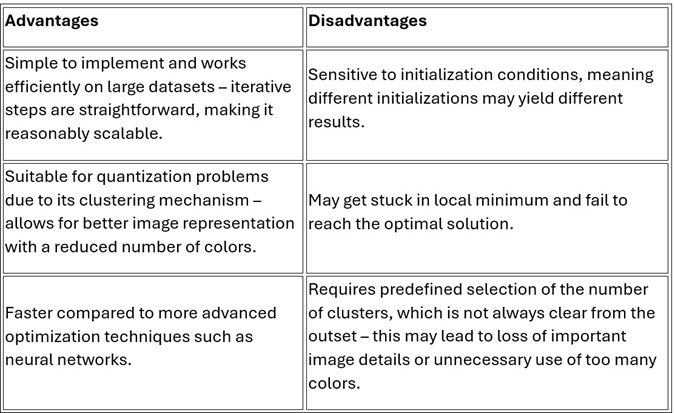

##Section B


**Comparison Between Scalar and Vector Quantization Methods**  

The image quality obtained in terms of Mean Squared Error (MSE) when performing scalar quantization independently on each of the R, G, and B channels is likely to be worse compared to the vector-based method described in the paper. The reason is that scalar quantization treats each color channel separately and does not account for correlations between the channels. Ignoring the relationships among the three channels can result in the loss of important color information and cause distortions. For instance, altering the B channel without considering R and G may lead to unnatural color representation. Consequently, the MSE would be higher.

In contrast, the vector-based method, which applies k-means for color quantization, reduces quantization errors compared to the scalar approach that processes each color channel independently. In k-means clustering, colors are grouped into clusters that better fit the color distribution in the image: rather than applying a fixed division per channel, the algorithm dynamically identifies which colors appear more frequently and places cluster centroids accordingly. This leads to a quantization process that reduces distortions, especially in smooth color transitions, and preserves important visual details. Therefore, the MSE decreases.


#Sections C-E

Mounting

In [6]:
from google.colab import drive
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/Multimedia_Compression/HW2/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Libraries

In [7]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity

Then we will copy from question number 1 the function that calculates our quality metrics for us:

In [8]:
def calculate_metrics(reference_image, compressed_image):
    mse_channel_values = [mean_squared_error(reference_image[:, :, ch], compressed_image[:, :, ch]) for ch in range(3)]
    psnr_channel_values = [peak_signal_noise_ratio(reference_image[:, :, ch], compressed_image[:, :, ch]) for ch in range(3)]
    ssim_channel_values = [structural_similarity(reference_image[:, :, ch], compressed_image[:, :, ch]) for ch in range(3)]

    average_mse = np.mean(mse_channel_values)
    average_psnr = np.mean(psnr_channel_values)
    average_ssim = np.mean(ssim_channel_values)
    return average_mse, average_psnr, average_ssim

We will connect to our drive to load the image we want:

Clusters=32 Metrics:
MSE: 42.1495
PSNR: 31.9728 dB  
SSIM: 0.9387
Original Size: 50.50 KB
Clustered Size: 38.07 KB
Compression Ratio: 1.3264


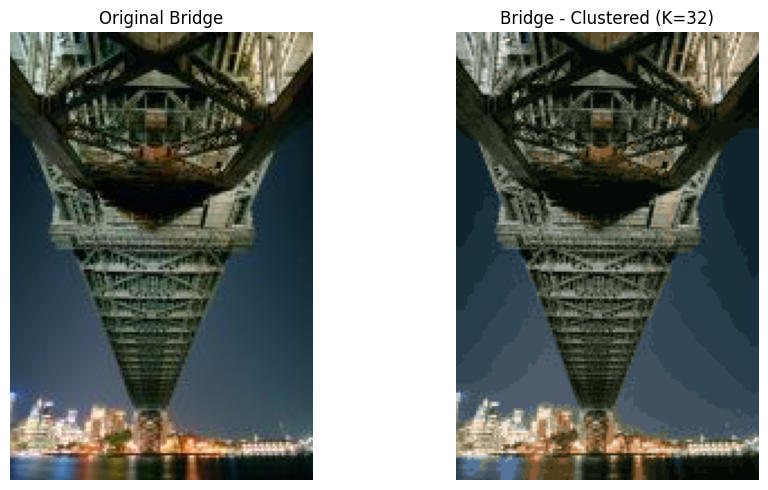

Clusters=64 Metrics:
MSE: 23.4841
PSNR: 34.4594 dB  
SSIM: 0.9630
Original Size: 50.50 KB
Clustered Size: 43.83 KB
Compression Ratio: 1.1522


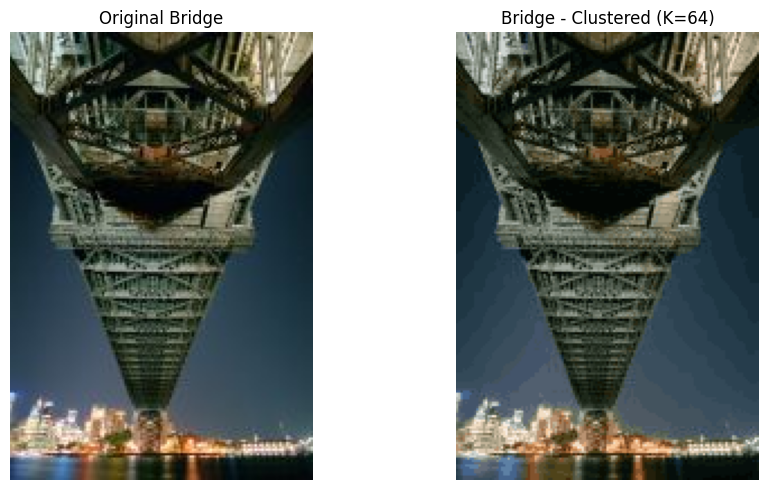

Clusters=128 Metrics:
MSE: 13.7933
PSNR: 36.7422 dB  
SSIM: 0.9776
Original Size: 50.50 KB
Clustered Size: 47.54 KB
Compression Ratio: 1.0622


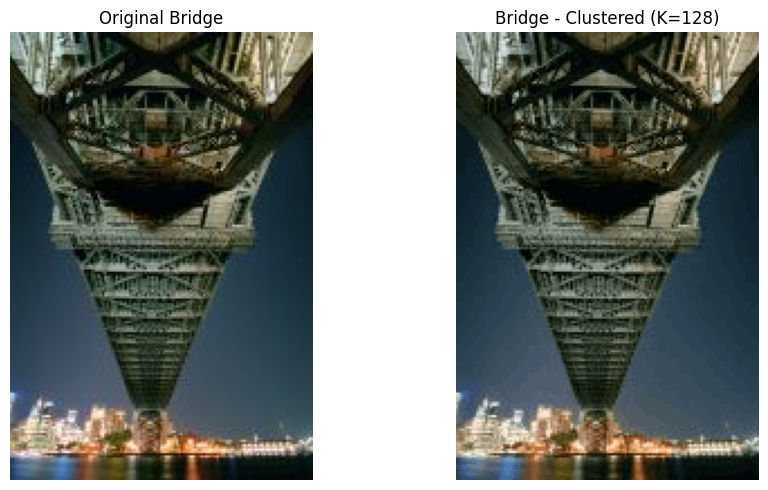

In [10]:
bridge = cv2.imread(drive_path + 'bridge.png')
bridge_RGB = cv2.cvtColor(bridge, cv2.COLOR_BGR2RGB)

def kmeans(image, clusters):
    height, width, channels = image.shape
    kmeans_model = KMeans(n_clusters=clusters, init='k-means++', random_state=42, n_init=10) # take the best from the n_init times
    labels = kmeans_model.fit_predict(image.reshape(-1, 3))
    clust_pix = kmeans_model.cluster_centers_[labels]
    return clust_pix.reshape((height, width, channels)).astype(np.uint8)

clusters_list = [32, 64, 128]
for cluster in clusters_list:
    clustered_image = kmeans(bridge_RGB, cluster)
    cv2.imwrite(drive_path + f'clustered_{cluster}_colors.png', cv2.cvtColor(clustered_image, cv2.COLOR_RGB2BGR))

    mse_result, psnr_result, ssim_result = calculate_metrics(bridge_RGB, clustered_image)

    original_file_size = os.path.getsize(drive_path + 'bridge.png')
    clustered_file_size = os.path.getsize(f'clustered_{cluster}_colors.png')
    size_ratio = original_file_size / clustered_file_size
    original_file_size_KB = original_file_size / 1024
    clustered_file_size_KB = clustered_file_size / 1024


    print(f'Clusters={cluster} Metrics:')
    print(f'MSE: {mse_result:.4f}\nPSNR: {psnr_result:.4f} dB  \nSSIM: {ssim_result:.4f}')
    print(f'Original Size: {original_file_size_KB:.2f} KB')
    print(f'Clustered Size: {clustered_file_size_KB:.2f} KB')
    print(f'Compression Ratio: {size_ratio:.4f}')

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Bridge")
    plt.imshow(bridge_RGB)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title(f"Bridge - Clustered (K={cluster})")
    plt.imshow(clustered_image)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

## Section C



We chose the k-means++ initialization method because it provides more stable results compared to random initialization, which may yield different outcomes in each run. By selecting initial centroids in a more calculated manner rather than randomly, k-means++ ensures greater consistency. Additionally, it improves quantization quality by choosing centroids more intelligently, which helps reduce the chances of getting stuck in a local minimum. This is achieved by selecting initial centroids that are as far apart as possible, thereby increasing the likelihood of reaching a globally optimal solution. Moreover, k-means++ typically leads to faster convergence, as it starts from better initial points, requiring fewer iterations to reach an optimal clustering compared to random initialization.

## Section D

| **K - Clusters** | **MSE**   | **PSNR (dB)**     | **SSIM**   |
|------------------|------------|---------------|--------------|
| 32              | 42.1495    | 31.9728       | 0.9387       |
| 64              | 23.4841    | 34.4594       | 0.9630       |
| 128             | 13.7933    | 36.7422       | 0.9776       |

As the number of clusters K increases, the quality of the quantized image improves. The reason is that having more clusters means that more colors are available to represent the image, preserving more details and making the quantized image more similar to the original.
This is supported by the metrics:
MSE decreases – the average squared error between the quantized and original image becomes smaller.
PSNR increases – the ratio of signal (original image) to noise (differences between images) improves.
SSIM (Structural Similarity Index) increases – the structural similarity between the quantized and original image improves.

In our quantized images we can see that with 32 clusters, the image loses many details. The quality is significantly reduced due to the small number of colors that has been chosen - k equals only 32 and it also shown by the high MSE, low PSNR, and low SSIM. While we are increasing the parameter k to 64 clusters, it improves preserving more data and making the image clearer than before with 32 clusters. The quality metrics are also improved compared to 32 clusters accordingly. With 128 clusters, the image retains most details and colors, most similar to the original with minimal distortion. This results in the best quality, with low MSE, high PSNR, and high SSIM.


## Section E

| **K - Clusters** | **Original Size (KB)** | **Clustered Size (KB)** | **Compression Ratio** |
|-------------------|---------------------------|----------------------------|-----------------------|
| 32                | 50.50                 | 38.07                 | 1.3264                 |
| 64                | 50.50                 | 43.83                    | 1.1522                 |
| 128               | 50.50                 | 47.54                    | 1.0622                 |



As the number of centroids K increases, more colors are added to the image, effectively adding more information. Consequently, the size of the quantized image increases, and directly, the compression ratio decreases because the quantized image becomes closer to the original image.